In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('cardio_train.csv', sep=";")

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#Размерность данных
print(data.shape)
print(f"Количество строк: {data.shape[0]}")
print(f"Количество столбцов: {data.shape[1]}")

(70000, 13)
Количество строк: 70000
Количество столбцов: 13


In [5]:
emissions_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Ящик с усами
Для просмотра наличия выбросов воспользуемся ящиком с усами(boxplot)

<img src="Screenshot_1.png" alt="Ящик с усами">

/Users/nikitakalmackiy/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


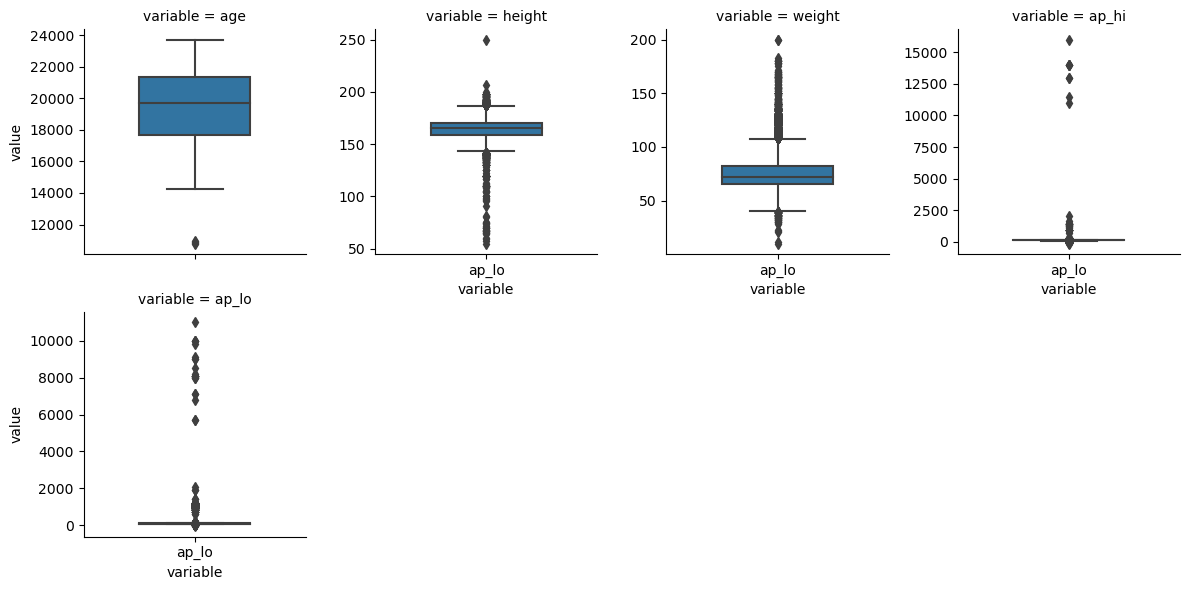

In [7]:
emissions_data = data[emissions_columns]

g = sns.FacetGrid(pd.melt(emissions_data), col="variable", col_wrap=4, sharey=False)
g.map(sns.boxplot, "variable", "value", width=0.5)

plt.show()

В контексте "ящика с усами", точки, которые находятся за пределами "усов", могут быть интерпретированы как потенциальные выбросы. Однако, это не всегда абсолютное правило, и интерпретация может зависеть от выбранного критерия для определения выбросов.

Стандартный метод определения выбросов при использовании "ящика с усами" основывается на межквартильном размахе (IQR). Точнее, значения, которые находятся за пределами интервала [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR], могут считаться выбросами.

In [8]:
all_outliers = []

for column in emissions_data.columns:
    # Вычисляем межквартильный размах
    Q1 = emissions_data[column].quantile(0.25)
    Q3 = emissions_data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Определяем выбросы
    column_outliers = emissions_data[(emissions_data[column] < Q1 - 1.5 * IQR) | (emissions_data[column] > Q3 + 1.5 * IQR)][column]
    
    # Добавляем результаты в список
    all_outliers.append(column_outliers)

# Выводим выбросы для каждого столбца
for i, column_outliers in enumerate(all_outliers):
    print(f"Выбросы для столбца {emissions_data.columns[i]}:")
    print(column_outliers)
    print("\n")

Выбросы для столбца age:
6219     10878
22343    10798
30666    10859
55905    10964
Name: age, dtype: int64


Выбросы для столбца height:
62       187
76       188
224       76
249      142
781      141
        ... 
69430    140
69475    187
69589    192
69784    141
69873    188
Name: height, Length: 519, dtype: int64


Выбросы для столбца weight:
15       112.0
62       115.0
83       110.0
196      108.0
267      115.0
         ...  
69873    108.0
69946    115.0
69947    113.0
69981    110.0
69996    126.0
Name: weight, Length: 1819, dtype: float64


Выбросы для столбца ap_hi:
59       180
61       180
101      190
209       80
230      180
        ... 
69587    180
69593    180
69830    180
69894    200
69997    180
Name: ap_hi, Length: 1435, dtype: int64


Выбросы для столбца ap_lo:
4          60
9          60
23         60
43         60
50         60
         ... 
69929     110
69932      60
69937      60
69967    1000
69978      60
Name: ap_lo, Length: 4632, dtype: int64




# Убирем выбросы из датасета и оставим только исследуемые критерии

In [36]:
no_emissions_data = emissions_data.drop(labels=list(column_outliers.index), axis=0)

In [37]:
no_emissions_data.head()

,age,height,weight,ap_hi,ap_lo
0,18393,168,62.0,110,80
1,20228,156,85.0,140,90
2,18857,165,64.0,130,70
3,17623,169,82.0,150,100
5,21914,151,67.0,120,80


In [47]:
print(no_emissions_data.shape)
print(f"Количество строк в датасете без выбросов: {no_emissions_data.shape[0]}")
print(f"Количество столбцов в датасете без выбросов: {no_emissions_data.shape[1]}")

(65368, 5)
Количество строк в датасете без выбросов: 65368
Количество столбцов в датасете без выбросов: 5


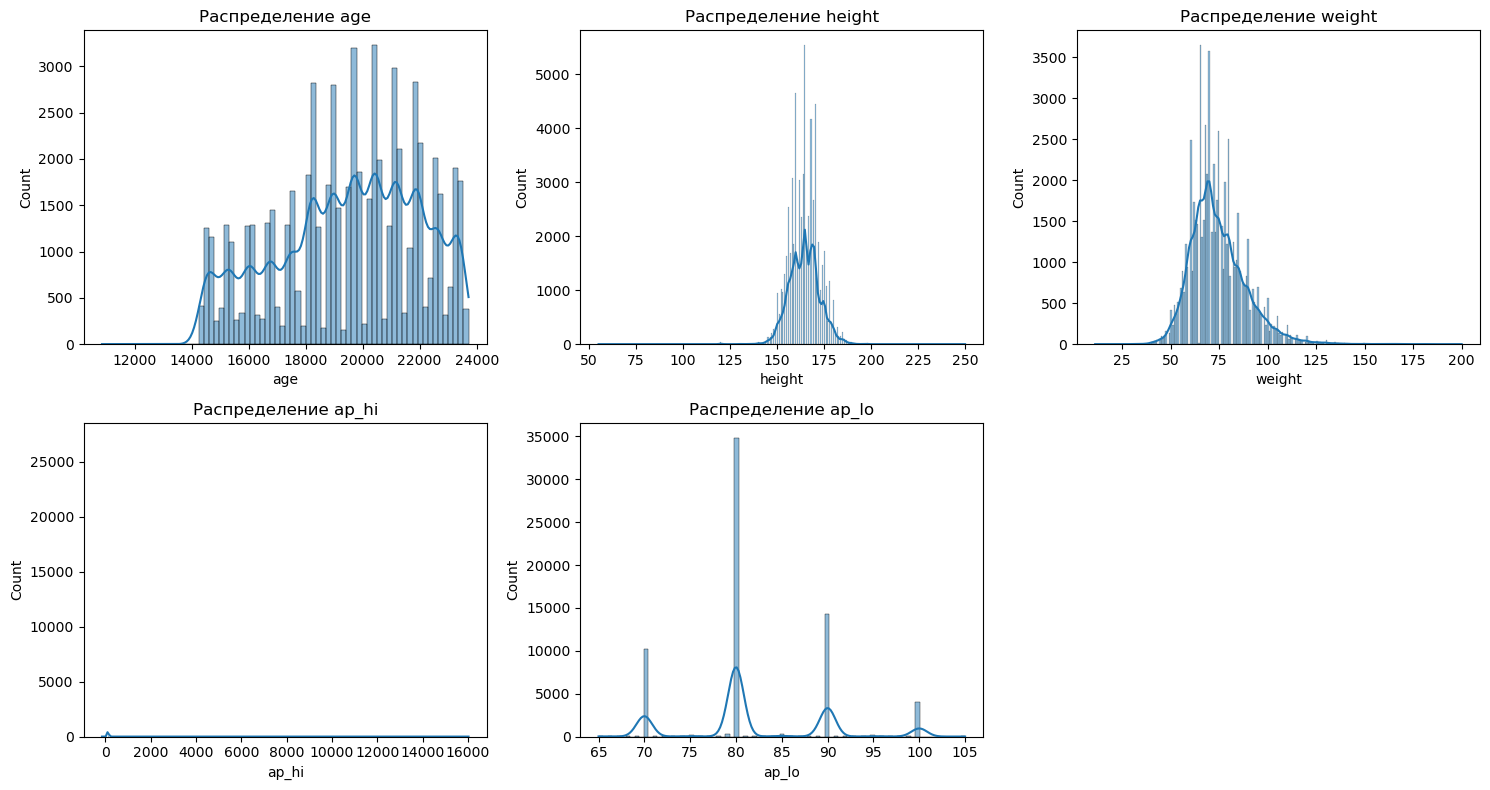

In [39]:
plt.figure(figsize=(15, 8))

num_rows = 2
num_cols = 3

for i, column in enumerate(no_emissions_data.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(no_emissions_data[column], kde=True)
    plt.title(f'Распределение {column}')

plt.tight_layout()
plt.show()

# Матрица ковариации

In [43]:
no_emission_matrix = np.array([no_emissions_data['age'], no_emissions_data['height'], no_emissions_data['weight'], no_emissions_data['ap_hi'], no_emissions_data['ap_lo']])
no_em_cov_m = np.cov(no_emission_matrix, bias=True)
no_em_cov_m

array([[ 6.04189041e+06, -1.80980806e+03,  1.56181909e+03,
         6.83475486e+03,  2.83352097e+03],
       [-1.80980806e+03,  6.67552871e+01,  3.32943600e+01,
         4.54176437e+00,  8.28124248e-01],
       [ 1.56181909e+03,  3.32943600e+01,  2.01974884e+02,
         5.62533302e+01,  2.50973517e+01],
       [ 6.83475486e+03,  4.54176437e+00,  5.62533302e+01,
         2.52128780e+04,  8.87161792e+01],
       [ 2.83352097e+03,  8.28124248e-01,  2.50973517e+01,
         8.87161792e+01,  6.12779397e+01]])

# Визуализация матрицы ковариации

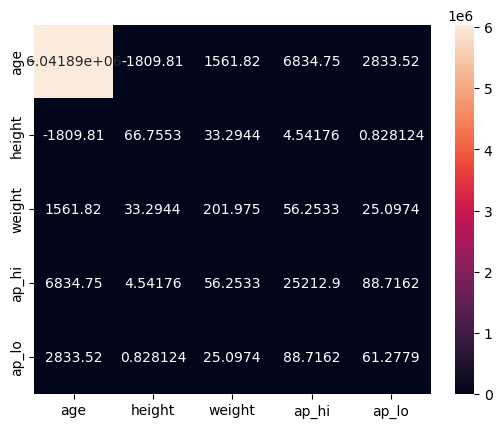

In [45]:
sns.heatmap(no_em_cov_m, annot=True, fmt='g', xticklabels=emissions_columns, yticklabels=emissions_columns)
plt.show()

Матрица ковариации, построенная выше, не дает четкого представления о том, у каких критериев наблюдается корреляция. Для получения более точной информации о наличии корреляции между признаками построим матрицу ковариации на отнормированных данных

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)
normalized_df = pd.DataFrame(normalized_data, columns=data.columns)

In [15]:
normalized_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-1.732080,-0.436062,1.364055,0.443452,-0.847873,-0.122182,-0.088238,-0.539322,-0.39572,-0.310879,-0.238384,0.494167,-0.9994
1,-1.732046,0.307686,-0.733108,-1.018168,0.749831,0.072610,-0.035180,2.400793,-0.39572,-0.310879,-0.238384,0.494167,1.0006
2,-1.732011,-0.247997,-0.733108,0.078047,-0.708942,0.007679,-0.141297,2.400793,-0.39572,-0.310879,-0.238384,-2.023607,1.0006
3,-1.731976,-0.748152,1.364055,0.565254,0.541435,0.137541,0.017879,-0.539322,-0.39572,-0.310879,-0.238384,0.494167,1.0006
4,-1.731942,-0.808543,-0.733108,-1.018168,-1.264666,-0.187113,-0.194356,-0.539322,-0.39572,-0.310879,-0.238384,-2.023607,-0.9994


In [16]:
matrix = np.array([normalized_df['age'], normalized_df['height'], normalized_df['weight'], normalized_df['ap_hi'], normalized_df['ap_lo']])
cov_m = np.cov(matrix, bias=True)
cov_m

array([[ 1.        , -0.08151535,  0.05368404,  0.02076432,  0.01764743],
       [-0.08151535,  1.        ,  0.29096783,  0.00548776,  0.00615047],
       [ 0.05368404,  0.29096783,  1.        ,  0.03070221,  0.04370977],
       [ 0.02076432,  0.00548776,  0.03070221,  1.        ,  0.01608551],
       [ 0.01764743,  0.00615047,  0.04370977,  0.01608551,  1.        ]])

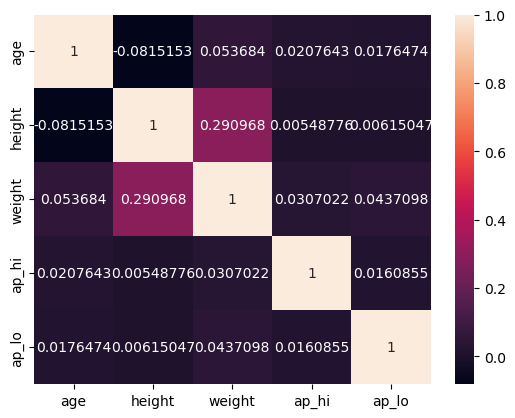

In [17]:
sns.heatmap(cov_m, annot=True, fmt='g', xticklabels=emissions_columns, yticklabels=emissions_columns)
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X = data[['height', 'age',]]
y = data['weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('R2:', np.sqrt(metrics.r2_score(y_test, y_pred)))

[72.6493134  74.17855346 77.62339064 ... 52.54652871 74.46154949
 71.71041204]
MAE: 10.55360055011419
R2: 0.3060280712894162


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X = data[['ap_hi', 'ap_lo',]]
y = data['weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('R2:', np.sqrt(metrics.r2_score(y_test, y_pred)))

[74.13330926 74.10326842 74.13330926 ... 77.12710867 74.13330926
 74.22495266]
MAE: 11.067615050059088
R2: 0.05945764985212297
